We first import the necessary python modules (note that the gcvspline package requires gfortran).

In [104]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from gcvspline import GCVSmoothedNSpline, MSESmoothedNSpline, DOFSmoothedNSpline, SmoothedNSpline

from pydmd import HODMD

import time
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


<font size="5">Light curves used:</font>

The unknown list contains cases where the data is too noisy, it doesn't look periodic enough (fitting the spline on many periods would be difficult), the curves are "hybrid" cases (could be RRab or RRc), contains holes in certain regions of the phase, there is 2 different (or similar) phases going on at the same time (Blazhko effect ?). For certain cases, revisiting the this list would be of great interest. For now, i will try to find general rules for the most ideal of cases.

In [105]:
unknown_list=['V159_1_asassn.fas', 'V158_2_nobot.fas', 'V101_2_nobad.fas', 'V271_2_nob99.fas', 'V267_3_nobad.fas', 'V136_4_nobad.fas', 'NV346_1_nobad.fas', 'V147_3_nobot.fas', 'V183_1_asassn.fas', 'V98_2_otnew_kal9704.fas', 'NV350_3_nob98_kal04.fas', 'V101_3_nobad.fas', 'V145_2_nobad.fas', 'V110_1_nobad.fas', 'V156_2_kal04.fas', 'V87_4_nobad.fas', 'V70_3_nobad.fas', 'V289_2_otnew_kal9704.fas', 'V267_2_nobad.fas', 'V60_3_allnew_kal9704.fas', 'NV342_4_nobad_u.fas', 'V291_3_nob9899.fas', 'V288_1_allnew_kal97.fas', 'V265_2_nobot.fas', 'NV456_1_asassn.fas', 'V277_2_nobad.fas', 'V64_1_nobad.fas', 'NV341_3_nob98_kal04.fas', 'V145_1_nobad.fas', 'V82_1_nobad.fas', 'V124_2_otnew_kal9704.fas', 'V68_2_nobad_kal9704.fas', 'V16_2_otnew_kal9704.fas', 'V47_2_otnew_kal9704.fas', 'V89_2_nobad.fas', 'V169_4_nobad.fas', 'V291_1_nob9899.fas', 'V265_1_nobot.fas', 'V64_2_nobad.fas', 'NV340_1_other_kal04.fas', 'V110_4_nobad.fas', 'V12_3_nobad.fas', 'V101_1_nobad.fas', 'NV353_4_nobad.fas', 'V270_3_nobad.fas', 'V66_3_nobot.fas', 'V273_4_nobad.fas', 'V117_3_nobot.fas', 'V70_1_nobad.fas', 'V184_3_nobad.fas', 'V104_2_nobad_kal9704.fas', 'V61_2_allnew_kal9704.fas', 'V105_2_nobad_kal9704.fas', 'NV343_4_nobad.fas', 'V64_3_nobad.fas', 'V178_1_asassn.fas', 'V48_1_allnew.fas', 'V154_4_nobad.fas', 'NV346_2_nobad.fas', 'V273_2_nobad.fas', 'V12_2_nobad.fas', 'V136_1_nobad.fas', 'V4_3_nobad_kal9704.fas', 'V144_3_nobad.fas', 'V43_3_allnew_kal04.fas', 'V97_3_allnew_kal9704.fas', 'V5_2_nobad.fas', 'V91_3_allnew_kal04.fas', 'NV354_4_nobad.fas', 'V106_4_allnew_kal04.fas', 'V109_4_nobad.fas', 'V117_4_nobot.fas', 'V118_4_nobad.fas', 'V121_4_nobad.fas', 'V132_4_nobad.fas', 'V135_4_nobad.fas', 'V137_4_nobad.fas', 'V139_4_nobad.fas', 'V144_4_nobad.fas', 'V146_4_nobad.fas', 'V21_4_nobad.fas', 'V267_4_nobad.fas', 'V274_4_nobad.fas', 'V277_4_nobad.fas', 'V58_4_nobad.fas', 'V66_4_nobad.fas', 'V89_4_nobad.fas', 'V120_4_allnew_kal9704.fas', 'V143_2_allnew_nob.fas', 'V98_1_otnew_kal9704.fas', 'V60_2_allnew_kal9704.fas', 'V110_2_nobad.fas', 'V139_2_nobad.fas', 'V27_2_nobad.fas', 'V96_2_nobad.fas', 'V48_2_allnew.fas', 'V144_2_nobad.fas', 'V43_2_allnew_kal04.fas', 'V143_1_nob98.fas', 'V132_2_nobad.fas', 'V98_4_otnew_kal9704d99.fas', 'V1_1_allnew_asas.fas', 'V111_2_nobad.fas', 'NV347_1_nobad.fas', 'V90_1_nob95.fas', 'V115_1_nobad.fas', 'V4_1_nobad_kal9704.fas', 'V144_1_nobad.fas', 'V60_1_allnew_kal9704.fas', 'V155_1_nobad.fas', 'V120_1_allnew_kal9704.fas']
RRc_list=['V166_1_nob98_kal9704.fas', 'V103_1_nobad.fas', 'V274_2_nobad.fas', 'V131_1_nobad.fas', 'NV343_1_nobad.fas', 'V264_2_nob99.fas', 'V154_1_nobad.fas', 'V94_2_nobad_kal04.fas', 'V158_4_nobot.fas', 'V35_1_nobad.fas', 'V121_1_nobad.fas', 'V266_1_nobad.fas', 'NV350_2_nob98_kal04.fas', 'V95_1_kal9704.fas', 'V22_1_otnew_kal9704.fas', 'V80_1_asassn.fas', 'V136_2_nobad.fas', 'NV344_2_nobad.fas', 'V12_1_nobad.fas', 'V153_1_nob95.fas', 'V289_1_otnew_kal9704.fas', 'V83_1_nobad.fas', 'V169_1_nobad.fas', 'V119_1_nobad.fas', 'NV341_1_nob98_kal04.fas', 'V270_1_nobad.fas', 'V21_2_nobad.fas', 'V117_1_nobot.fas', 'V14_1_otnew_kal04.fas', 'NV339_1_nobad.fas', 'NV349_1_nobad.fas', 'V155_2_nobad.fas', 'V145_4_nobad.fas', 'V36_1_otnew_kal97.fas', 'V184_1_nobad.fas', 'V177_1_asassn.fas', 'V75_2_otnew_kal9704.fas', 'V147_2_nobot.fas', 'V87_2_nobad.fas', 'V275_1_nobad.fas', 'V21_1_nobad.fas', 'NV350_1_nob98_kal04.fas', 'V270_2_nobad.fas', 'V105_1_nobad_kal9704.fas', 'V175_1_asassn.fas', 'V276_1_allnew_kal9704.fas', 'V169_2_nobad.fas', 'V119_2_nobad.fas', 'V35_3_nob98.fas', 'V267_1_nobad.fas', 'V151_1_asassn.fas', 'V173_1_asassn.fas', 'V119_4_nobad.fas', 'V184_2_nobad.fas', 'NV357_1_nob9598_kal04.fas', 'NV339_2_nobad.fas', 'NV399_1_nob9598.fas', 'NV349_2_nobad.fas', 'V275_2_nobad.fas', 'V87_1_nobad.fas', 'V276_2_allnew_kal9704.fas', 'V83_3_nobad.fas', 'V94_1_nobad_kal04.fas', 'V277_1_nobad.fas', 'V127_1_otnew_kal97.fas', 'NV343_2_nobad.fas', 'V35_4_nobad.fas', 'V131_2_nobad.fas', 'V264_1_nob99.fas', 'V276_4_allnew_kal9704.fas', 'V274_1_nobad.fas', 'V169_3_nobad.fas', 'V103_2_nobad.fas', 'V12_4_nobad.fas', 'V272_1_allnew_kal9704.fas', 'V154_2_nobad.fas', 'V103_4_nobad.fas', 'NV341_2_nob98_kal04.fas', 'V266_2_nobad.fas', 'V35_2_nobad.fas', 'V121_2_nobad.fas', 'V131_4_nobad.fas', 'V280_4_nob95.fas', 'V83_2_nobad.fas', 'V68_1_nobad_kal9704.fas', 'NV344_1_nobad.fas', 'V50_2_otnew_kal9704.fas', 'V117_2_nobot.fas', 'V157_4_nobad.fas']
RRab_list=['V141_3_nobad.fas', 'V59_3_nobot.fas', 'V112_3_allnew_kal9704.fas', 'V120_3_allnew_kal9704.fas', 'V115_2_nobad.fas', 'V128_2_nobad.fas', 'V34_2_nobad.fas', 'V59_2_nobot.fas', 'V102_2_nobad.fas', 'V4_2_nobad_kal9704.fas', 'V51_2_nobad.fas', 'V86_2_nobad.fas', 'V5_4_nobad.fas', 'V106_2_allnew_kal04.fas', 'V107_2_nobad.fas', 'V118_2_nobad.fas', 'V122_2_nobad.fas', 'V141_2_nobad.fas', 'V40_2_nobad.fas', 'V113_2_nobad.fas', 'V108_2_nobad.fas', 'V109_2_nobad.fas', 'V146_2_nobad.fas', 'V41_2_nobad.fas', 'V15_2_nobad.fas', 'V62_2_nobad.fas', 'V100_2_nobad.fas', 'V112_2_allnew_kal9704.fas', 'V97_2_allnew_kal9704.fas', 'V120_2_allnew_kal9704.fas', 'V135_2_nobad.fas', 'V91_2_allnew_kal04.fas', 'V106_1_allnew_kal04.fas', 'V114_2_nobad.fas', 'V23_2_nobad.fas', 'V91_1_allnew_kal04.fas', 'V41_1_nobad.fas', 'V26_1_nob95.fas', 'V44_1_nob95.fas', 'V102_1_nobad.fas', 'V107_1_nobad.fas', 'V108_1_nobad.fas', 'V109_1_nobad.fas', 'V113_1_nobad.fas', 'V146_1_nobad.fas', 'V112_1_allnew_kal9704.fas', 'V118_1_nobad.fas', 'V122_1_nobad.fas', 'V128_1_nobad.fas', 'V141_1_nobad.fas', 'V34_1_nobad.fas', 'V40_1_nobad.fas', 'V59_1_nobot.fas', 'V139_1_nobad.fas', 'V15_1_nobad.fas', 'V27_1_nobad.fas', 'V51_1_nobad.fas', 'V5_1_nobad.fas', 'V62_1_nobad.fas', 'V96_1_nobad.fas', 'V100_1_nobad.fas', 'V20_1_nobad.fas', 'V86_1_nobad.fas', 'V43_1_allnew_kal04.fas', 'V135_1_nobad.fas', 'V97_1_allnew_kal9704.fas', 'V114_1_nobad.fas', 'V132_1_nobad.fas', 'V23_1_nobad.fas', 'V111_1_nobad.fas']

all_list=np.concatenate((unknown_list,RRc_list,RRab_list))

<font size="5">Functions used to apply DMD to the light curves :</font>

This is the heart of the code. To facilitate automation, debug and improve run time, we separate functions and call them according to what we want to achieve. The code in the HODMD_model function is heavily inspired from https://mathlab.github.io/PyDMD/tutorial6hodmd.html.

In [106]:
#The first step is to find an optimal spline using generalized cross-validation.
#Next, we use the spline (as a function) to pick snapshots from with a certain snapshot_density (points per phase)
def snapshot_preprocessing(file_name,x_no_file=None,t_no_file=None,silent=False,n_extension=2,snapshot_density=30):
    
    if file_name!=None:
        
        df=pd.read_csv('/Users/nicolasmekhael/Desktop/Summer_Project/Data/omegacen_lcvs/'+ file_name 
                       ,skiprows=1, header=None,sep='   ',engine="python")    #Converting file into pandas dataframe 
        df.drop(0,axis=1, inplace=True) #Dropping collumns that are not x or t
        df.drop(3,axis=1, inplace=True)
        df.columns = ["t", "x"]
        
    else:#For the case where we use phases not directly from file (Blazhko effect example)
        df=pd.DataFrame(data={"t":t_no_file,"x":x_no_file})
       
    df.sort_values("t", inplace=True)
    df.drop_duplicates(subset=['t'], keep='first', inplace=True) #sorting by t and dropping dupplicates

    t=np.array(df["t"])
    x=np.array(df["x"]) #From dataframe to numpy array

    original_data_t=t
    original_data_x=x
    
    #Repeating the original data over many phases
    n_phase=2*n_extension+1

    list_t_minus=[]
    list_t_plus=[]
    for i in range(n_extension):
        phase_delay=i+1
        list_t_minus=np.append(list_t_minus, t-n_extension+i)
        list_t_plus=np.append(list_t_plus, t+phase_delay)
    all_t=np.concatenate((list_t_minus,t,list_t_plus))
    all_x=np.tile(x, n_phase)
    
    #Fitting spline over many phases to ensure proper periodicity
    ts=np.linspace(-n_extension,n_extension+1,n_phase*1000)
    GCV_auto = GCVSmoothedNSpline(all_t, all_x)
    
    #Picking certain snapshots from spline depending on snapshot_density
    snapshot_t_DMD=np.linspace(-n_extension,n_extension+1,n_phase*snapshot_density)
    snapshot_x_DMD=GCV_auto(snapshot_t_DMD)
    
    if silent==False:
        plt.figure(figsize=(15, 5))
        plt.title(file_name)
        plt.plot(ts, GCV_auto(ts),color="red",label="GCV Spline")
        plt.scatter(original_data_t,original_data_x,s=1,color="black", label="Original Data")
        plt.scatter(snapshot_t_DMD,snapshot_x_DMD,s=7,color="blue", label="DMD snapshots")
        plt.xlabel("t")
        plt.ylabel("x")
        plt.legend()
        plt.show()
    
    return(GCV_auto,original_data_t,original_data_x,snapshot_t_DMD,snapshot_x_DMD)

def HODMD_model(snapshot_x_DMD,snapshot_t_DMD,original_data_x,original_data_t,GCV_auto,d,predicted_phases,silent):

    snapshots=snapshot_x_DMD
    x=snapshot_t_DMD

    hodmd = HODMD(exact=True, opt=True, d=d).fit(snapshots)
    
    if silent==False:
        print("Data Shape: "+str(hodmd.reconstructed_data.shape))
        hodmd.plot_eigs()

    hodmd.original_time['dt'] = hodmd.dmd_time['dt'] = x[1] - x[0]
    hodmd.original_time['t0'] = hodmd.dmd_time['t0'] = x[0]
    hodmd.original_time['tend'] = hodmd.dmd_time['tend'] = x[-1]

    hodmd.dmd_time['tend'] = predicted_phases
    
    if silent==False:

        fig = plt.figure(figsize=(15, 5))
        plt.plot(x, snapshots, '.', label='Snapshots from spline')
        plt.plot(hodmd.dmd_timesteps, hodmd.reconstructed_data[0].real, '--', label='DMD output') 
        plt.scatter(original_data_t,original_data_x,s=1,color="red",label="Original Data")
        plt.scatter(original_data_t+predicted_phases-2,original_data_x,s=1,color="green",label="Original Data Far into DMD Prediction")
        plt.legend()
        plt.show()
    
    eigenvalues=hodmd.eigs
    DMD_t=hodmd.dmd_timesteps
    DMD_x=hodmd.reconstructed_data[0].real
    Koopman_operator=HODMD.atilde
    modes=HODMD.modes
    dynamics=HODMD.dynamics
    
    #MSE calculated where the original data is shown in green
    t_verif_phase=[t for t in DMD_t if t>=predicted_phases-2 and t<= predicted_phases-1]
    first_index,=np.where(DMD_t==t_verif_phase[0])
    last_index,=np.where(DMD_t==t_verif_phase[-1])
    t_spline_verif=np.subtract(t_verif_phase,predicted_phases-2)
 
    MSE=np.mean(np.square(GCV_auto(t_spline_verif)-DMD_x[first_index[0]:last_index[0]+1]))

    if silent==False:
        plt.figure()
        plt.scatter(t_spline_verif,GCV_auto(t_spline_verif),s=5)
        plt.scatter(t_spline_verif,DMD_x[first_index[0]:last_index[0]+1], s=3)
        
    
    return(DMD_t,DMD_x,eigenvalues,Koopman_operator,modes,dynamics,MSE)

def manual_DMD(file_name,d,snapshot_density,n_extension=2,x_no_file=None,t_no_file=None
                  ,predicted_phases=15,silent=False):
               
    GCV_auto,original_data_t,original_data_x,snapshot_t_DMD,snapshot_x_DMD=snapshot_preprocessing(file_name,
                                                                                                  x_no_file=x_no_file,
                                                                                                  t_no_file=t_no_file,
                                                                                                  silent=silent,
                                                                                                  n_extension=n_extension
                                                                                                  ,snapshot_density=snapshot_density)

    DMD_t,DMD_x,eigenvalues,Koopman_operator,modes,dynamics,MSE=HODMD_model(snapshot_x_DMD,snapshot_t_DMD,
                                                                            original_data_x,original_data_t,
                                                                            GCV_auto,d,predicted_phases,silent)
    return(DMD_t,DMD_x,eigenvalues,Koopman_operator,modes,dynamics,MSE)

def automatic_DMD(file_name,d_range,snapshot_density,n_extension=2,x_no_file=None,t_no_file=None
                  ,predicted_phases=15,silent=False):
    
    GCV_auto,original_data_t,original_data_x,snapshot_t_DMD,snapshot_x_DMD=snapshot_preprocessing(file_name,
                                                                                                  x_no_file=x_no_file,
                                                                                                  t_no_file=t_no_file,
                                                                                                  silent=silent,
                                                                                                  n_extension=n_extension
                                                                                                  ,snapshot_density=snapshot_density)
    
    MSE_list=[]
    eigenvalues_number_list=[]
    for i in range(len(d_range)):
        DMD_t,DMD_x,eigenvalues,Koopman_operator,modes,dynamics,MSE=HODMD_model(snapshot_x_DMD,snapshot_t_DMD,
                                                                            original_data_x,original_data_t,
                                                                            GCV_auto,d_range[i],predicted_phases,silent=True)
        eigenvalues_number_list.append(len(eigenvalues))
        MSE_list.append(MSE)
    
    if silent==False:
        plt.figure()  
        plt.plot(d_range,MSE_list)
        plt.yscale('log')
        plt.xlabel("d")
        plt.ylabel("MSE")
        plt.title("Evolution of Error with DMD Parameter d")
        plt.show()
        print("The best fit is shown below.")
    
        DMD_t,DMD_x,eigenvalues,Koopman_operator,modes,dynamics,MSE=HODMD_model(snapshot_x_DMD,snapshot_t_DMD,
                                                                            original_data_x,original_data_t,
                                                                            GCV_auto,d_range[np.argmin(MSE_list)],predicted_phases,silent=False)
    return(MSE_list,d_range,eigenvalues_number_list)
        
def MSE_evolution_comparison(RRc_files,RRab_files,MSE_threshold_DMD,d_range,
                             snapshot_density=30,n_extension=2,predicted_phases=15,MSE_ceiling=2):
    MSE_list_list_RRc=[]
    eigenvalues_number_list_list_RRc=[]
    for file_name in RRc_files:
        MSE_list,d_range,eigenvalues_number_list=automatic_DMD(file_name,d_range,snapshot_density,n_extension=n_extension,
                                                               x_no_file=None,t_no_file=None,predicted_phases=15,silent=True)
        
        #Brings down MSE for when it blows up (high d) to better show MSE evolution in plots
        for i in range(len(MSE_list)):
            if MSE_list[i]>MSE_ceiling:
                MSE_list[i]=MSE_ceiling
                
        MSE_list_list_RRc.append(MSE_list)
        eigenvalues_number_list_list_RRc.append(eigenvalues_number_list)
        
    MSE_list_list_RRab=[]
    eigenvalues_number_list_list_RRab=[]
    for file_name in RRab_files:
        MSE_list,d_range,eigenvalues_number_list=automatic_DMD(file_name,d_range,snapshot_density,n_extension=n_extension,
                                                               x_no_file=None,t_no_file=None,predicted_phases=15,silent=True)
        
        #Brings down MSE for when it blows up (high d) to better show MSE evolution in plots
        for i in range(len(MSE_list)):
            if MSE_list[i]>MSE_ceiling:
                MSE_list[i]=MSE_ceiling
        
        MSE_list_list_RRab.append(MSE_list)
        eigenvalues_number_list_list_RRab.append(eigenvalues_number_list)
        
        
    plt.figure()
    for i in range(len(MSE_list_list_RRc)):
        plt.semilogy(d_range,MSE_list_list_RRc[i],color="red")
    for i in range(len(MSE_list_list_RRab)):
        plt.semilogy(d_range,MSE_list_list_RRab[i],color="black")
    plt.title("MSE with d (RRc:red,RRab:black)")
    plt.xlabel("d")
    plt.ylabel("MSE")
    plt.show()
    
    average_MSE_RRc=np.mean(MSE_list_list_RRc, axis=0)
    average_MSE_RRab=np.mean(MSE_list_list_RRab, axis=0)
    std_MSE_RRc=np.std(MSE_list_list_RRc, axis=0)
    std_MSE_RRab=np.std(MSE_list_list_RRab, axis=0)
    
    confidence_interval_list_RRc_lower=[]
    confidence_interval_list_RRc_upper=[]
    confidence_interval_list_RRab_lower=[]
    confidence_interval_list_RRab_upper=[]
    for i in range(len(d_range)):
        ci_RRc=stats.norm.interval(0.90, loc=average_MSE_RRc[i], scale=std_MSE_RRc[i]/np.sqrt(len(RRc_files)))#89 RRc files,90% ci
        ci_RRab=stats.norm.interval(0.90, loc=average_MSE_RRab[i], scale=std_MSE_RRab[i]/np.sqrt(len(RRab_files)))#70 RRab files,90% ci
        confidence_interval_list_RRc_lower.append(ci_RRc[0])
        confidence_interval_list_RRc_upper.append(ci_RRc[1])
        confidence_interval_list_RRab_lower.append(ci_RRab[0])
        confidence_interval_list_RRab_upper.append(ci_RRab[1])
        
    plt.figure()
    plt.plot(d_range,average_MSE_RRc,color="red",label="Mean MSE Evolution for RRc Variables")
    plt.plot(d_range,average_MSE_RRab,color="black",label="Mean MSE Evolution for RRab Variables")
    plt.fill_between(d_range, (confidence_interval_list_RRc_lower), (confidence_interval_list_RRc_upper), color='red', alpha=0.3)
    plt.fill_between(d_range, (confidence_interval_list_RRab_lower), (confidence_interval_list_RRab_upper), color='black', alpha=0.3)
    plt.title("MSE Evolution (with Confidence Interval)")
    plt.xlabel("d")
    plt.ylabel("MSE")
    plt.legend()
    plt.yscale('log')
    plt.show()
    
    plt.figure()
    for i in range(len(MSE_list_list_RRc)):
        plt.semilogy(eigenvalues_number_list_list_RRc[i],MSE_list_list_RRc[i],color="red")
    for i in range(len(MSE_list_list_RRab)):
        plt.semilogy(eigenvalues_number_list_list_RRab[i],MSE_list_list_RRab[i],color="black")
    plt.title("MSE with Number of Eigenvalues (RRc:red,RRab:black)")
    plt.xlabel("Number of Eigenvalues")
    plt.ylabel("MSE")
    plt.show()
    
    average_eigenvalues_n_RRc=np.mean(eigenvalues_number_list_list_RRc, axis=0)
    average_eigenvalues_n_RRab=np.mean(eigenvalues_number_list_list_RRab, axis=0)
    
    plt.figure()
    plt.plot(average_eigenvalues_n_RRc,average_MSE_RRc,color="red",label="Mean MSE Evolution for RRc Variables")
    plt.plot(average_eigenvalues_n_RRab,average_MSE_RRab,color="black",label="Mean MSE Evolution for RRab Variables")
    plt.fill_between(average_eigenvalues_n_RRc, (confidence_interval_list_RRc_lower), (confidence_interval_list_RRc_upper), color='red', alpha=0.3)
    plt.fill_between(average_eigenvalues_n_RRab, (confidence_interval_list_RRab_lower), (confidence_interval_list_RRab_upper), color='black', alpha=0.3)
    plt.title("MSE Evolution (with Confidence Interval)")
    plt.xlabel("Number of Eigenvalues")
    plt.ylabel("MSE")
    plt.legend()
    plt.yscale('log')
    plt.show()
    
    plt.figure()
    for i in range(len(MSE_list_list_RRc)):
        plt.plot(d_range,eigenvalues_number_list_list_RRc[i],color="red")
    for i in range(len(MSE_list_list_RRab)):
        plt.plot(d_range,eigenvalues_number_list_list_RRab[i],color="black")
    plt.title("Number of Eigenvalues with d (RRc:red,RRab:black)")
    plt.xlabel("d")
    plt.ylabel("Number of Eigenvalues")
    plt.show()
    
    average_eigenvalues_n_RRc=np.mean(eigenvalues_number_list_list_RRc, axis=0)
    average_eigenvalues_n_RRab=np.mean(eigenvalues_number_list_list_RRab, axis=0)
    std_eigenvalues_n_RRc=np.std(eigenvalues_number_list_list_RRc, axis=0)
    std_eigenvalues_n_RRab=np.std(eigenvalues_number_list_list_RRab, axis=0)
    
    confidence_interval_list_RRc_lower=[]
    confidence_interval_list_RRc_upper=[]
    confidence_interval_list_RRab_lower=[]
    confidence_interval_list_RRab_upper=[]
    for i in range(len(d_range)):
        ci_RRc=stats.norm.interval(0.90, loc=average_eigenvalues_n_RRc[i], scale=std_eigenvalues_n_RRc[i]/np.sqrt(89))#89 RRc files,90% ci
        ci_RRab=stats.norm.interval(0.90, loc=average_eigenvalues_n_RRab[i], scale=std_eigenvalues_n_RRab[i]/np.sqrt(70))#70 RRab files,90% ci
        confidence_interval_list_RRc_lower.append(ci_RRc[0])
        confidence_interval_list_RRc_upper.append(ci_RRc[1])
        confidence_interval_list_RRab_lower.append(ci_RRab[0])
        confidence_interval_list_RRab_upper.append(ci_RRab[1])
        
    plt.figure()
    plt.plot(d_range,average_eigenvalues_n_RRc,color="red",label="Mean Eigenvalue Number Evolution for RRc Variables")
    plt.plot(d_range,average_eigenvalues_n_RRab,color="black",label="Mean Eigenvalue Number Evolution for RRab Variables")
    plt.fill_between(d_range, (confidence_interval_list_RRc_lower), (confidence_interval_list_RRc_upper), color='red', alpha=0.3)
    plt.fill_between(d_range, (confidence_interval_list_RRab_lower), (confidence_interval_list_RRab_upper), color='black', alpha=0.3)
    plt.title("Eigenvalue Number Evolution (with Confidence Interval)")
    plt.xlabel("d")
    plt.ylabel("Number of Eigenvalues")
    plt.legend()
    plt.show()

        
    ok_d_list_RRc=[]
    eigenvalue_number_list_RRc=[]
    for i in range(len(MSE_list_list_RRc)):
        MSE_below_threshold=[MSE for MSE in MSE_list_list_RRc[i] if MSE<=MSE_threshold_DMD]
        ok_d=d_range[MSE_list_list_RRc[i].index(MSE_below_threshold[0])]
        ok_d_list_RRc.append(ok_d)
        
        
        DMD_t,DMD_x,eigenvalues,Koopman_operator,modes,dynamics,MSE=manual_DMD(RRc_files[i],
                                                                               ok_d,snapshot_density=800,
                                                                               n_extension=5,x_no_file=None,t_no_file=None
                                                                            ,predicted_phases=15,silent=True)
        eigenvalue_number_list_RRc.append(len(eigenvalues))
        
        
        
    ok_d_list_RRab=[]
    eigenvalue_number_list_RRab=[]
    for i in range(len(MSE_list_list_RRab)):
        MSE_below_threshold=[MSE for MSE in MSE_list_list_RRab[i] if MSE<=MSE_threshold_DMD]
        ok_d=d_range[MSE_list_list_RRab[i].index(MSE_below_threshold[0])]
        ok_d_list_RRab.append(ok_d)
        
        DMD_t,DMD_x,eigenvalues,Koopman_operator,modes,dynamics,MSE=manual_DMD(RRab_files[i],
                                                                               ok_d,snapshot_density=800,
                                                                               n_extension=5,x_no_file=None,t_no_file=None
                                                                                ,predicted_phases=15,silent=True)
        eigenvalue_number_list_RRab.append(len(eigenvalues))

        
    bins = np.arange(0,20,1)
    plt.figure()
    plt.hist(eigenvalue_number_list_RRc,bins,color="red",label="RRc",alpha=0.5)
    plt.hist(eigenvalue_number_list_RRab,bins,color="black",label="RRab",alpha=0.5)
    plt.legend(loc='upper right')
    plt.title("Distribution of Number of Eigenvalues to reach MSE="+str(MSE_threshold_DMD))
    plt.xlabel("Number of Eigenvalues")
    plt.ylabel("Number of Stars")
    plt.xticks(np.arange(0, 21, 2))
    plt.show()
    
    bins = d_range
    plt.figure()
    plt.hist(ok_d_list_RRc,bins,color="red",label="RRc",alpha=0.5)
    plt.hist(ok_d_list_RRab,bins,color="black",label="RRab",alpha=0.5)
    plt.legend(loc='upper right')
    plt.title("Distribution of minimum d to reach MSE="+str(MSE_threshold_DMD))
    plt.xlabel("d")
    plt.ylabel("Number of Stars")
    plt.show()
    
        
    return(MSE_list_list_RRc,MSE_list_list_RRab,d_range,
           eigenvalues_number_list_list_RRc,eigenvalues_number_list_list_RRab)

<font size="5">Light curves with well fitted spline:</font>

Here, we look at the spline fit of each curves and make sure to not include the few curves that are not well interpolated.

Problem Curves:

RRc:



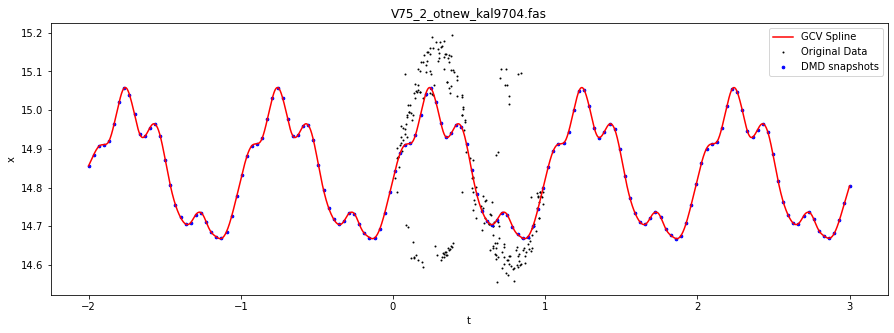

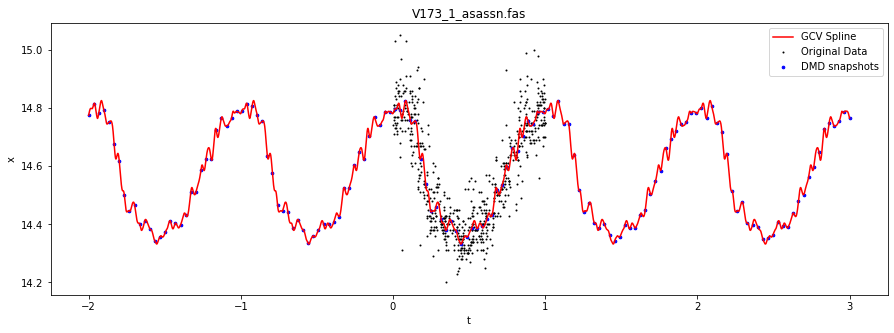

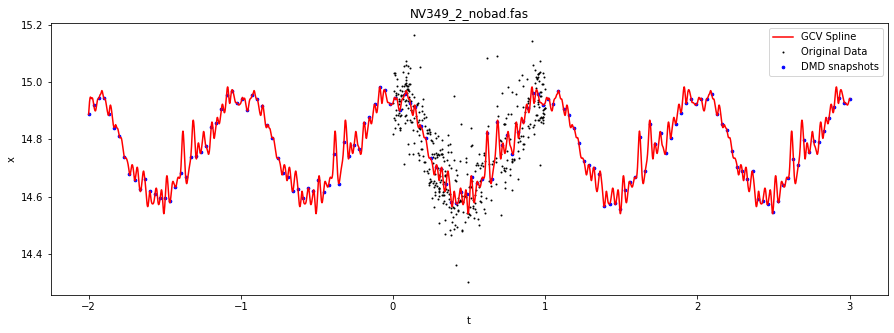

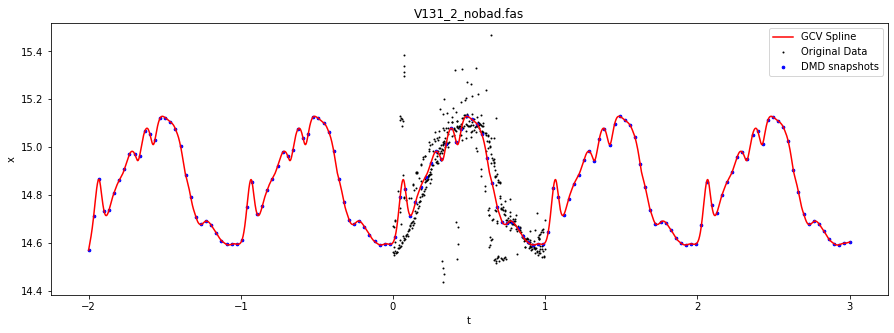

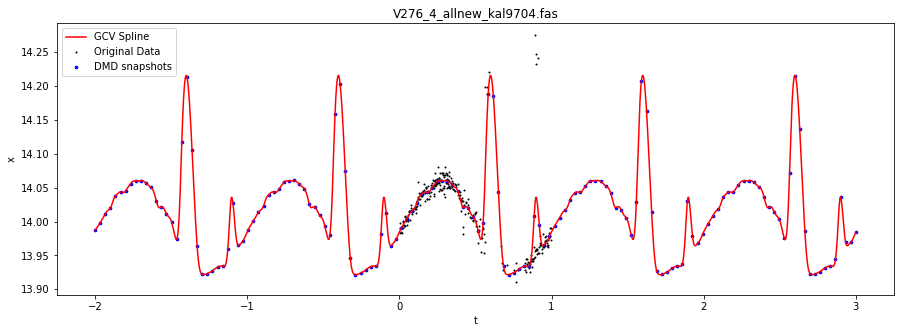

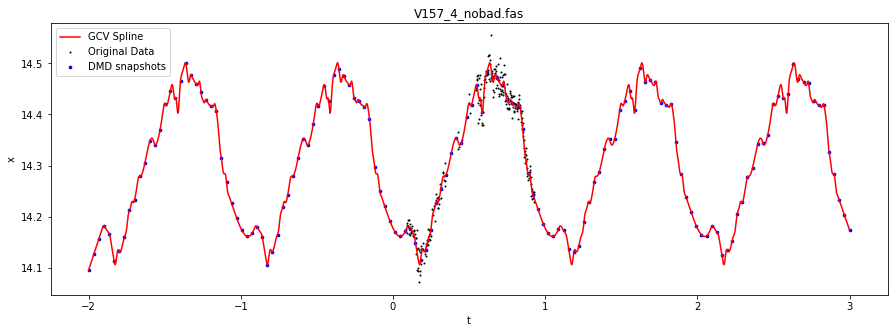


RRab:



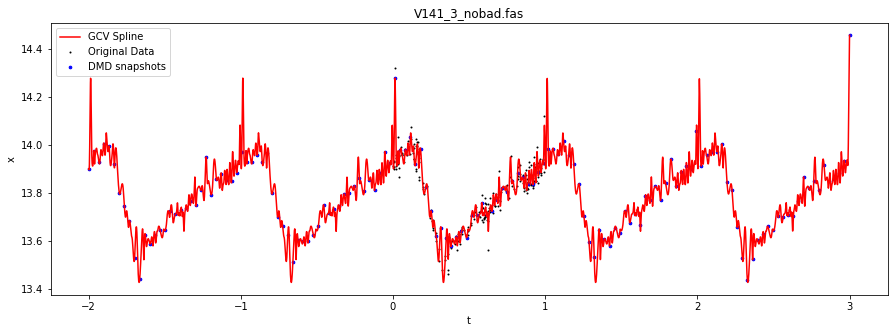

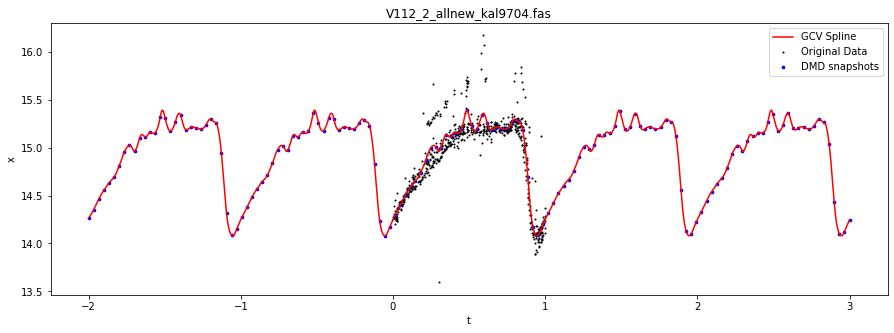

In [107]:
#The code commented out was used to show each fit (it is commented out to not take up
#too much Jupyter notebook output space).
"""
print("RRc light curves:")
print()
print()
for file_name in RRc_list:
    print(file_name)
    snapshot_preprocessing(file_name,x_no_file=None,t_no_file=None,silent=False,n_extension=2,snapshot_density=30)

print()
print("RRab light curves:")
print()    
print()
for file_name in RRab_list:
    print(file_name)
    snapshot_preprocessing(file_name,x_no_file=None,t_no_file=None,silent=False,n_extension=2,snapshot_density=30)
"""
    
#We (manually) find the following light curves that are not well interpolated and find:
RRc_bad=["V75_2_otnew_kal9704.fas","V173_1_asassn.fas","NV349_2_nobad.fas","V131_2_nobad.fas","V276_4_allnew_kal9704.fas","V157_4_nobad.fas"]
RRab_bad=["V141_3_nobad.fas","V112_2_allnew_kal9704.fas"]

#Some problem curves' fit could probably be fixed (and good ones improved) by deleting outliers.
#However, we would need to choose the percentile of outliers manually each time (is there a way to automate it)

print("Problem Curves:")
print()
print("RRc:")
print()
for file_name in RRc_bad:
    snapshot_preprocessing(file_name,x_no_file=None,t_no_file=None,silent=False,n_extension=2,snapshot_density=30)
print()
print("RRab:")
print()
for file_name in RRab_bad:
    snapshot_preprocessing(file_name,x_no_file=None,t_no_file=None,silent=False,n_extension=2,snapshot_density=30)
    
#Updating the RRc and RRab lists
for file in RRc_bad:
    RRc_list.remove(file)
for file in RRab_bad:
    RRab_list.remove(file)

<font size="5">Seeing how the two types of variables compare:</font>

Here we compare the required d and number of eigenvalues necessary to reach a certain accuracy to the fit. We notice that for some RRc stars, the MSE blows up for a high d. However, the overall behavior of DMD is as expected. 

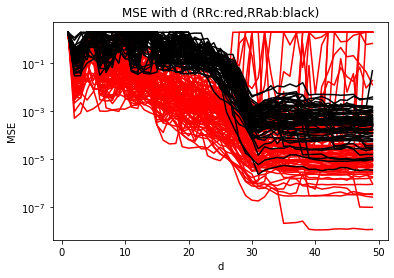

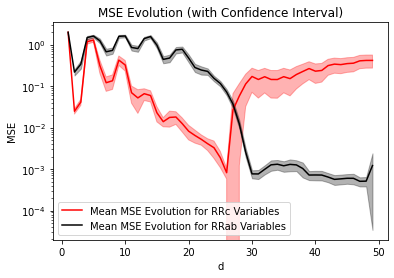

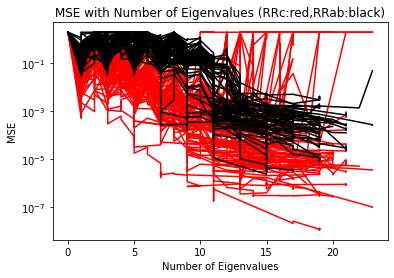

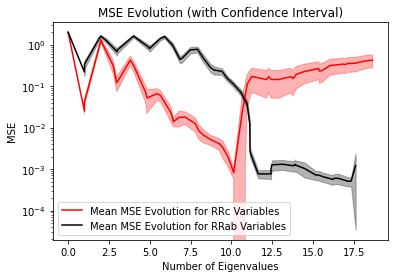

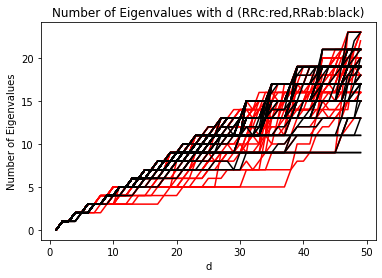

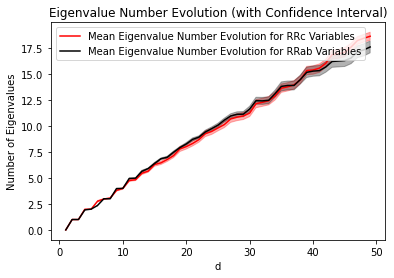

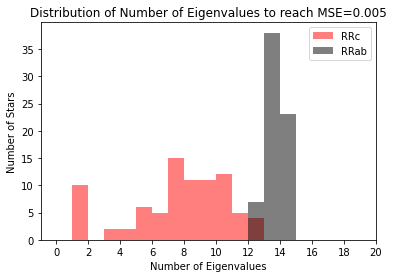

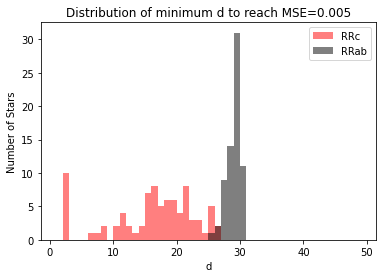

Runtime of the program is 85.62959885597229 seconds.


In [108]:

start = time.time()

RRc_files=RRc_list
RRab_files=RRab_list
MSE_threshold_DMD=0.005
d_range=np.arange(1,50,1)
MSE_evolution_comparison(RRc_files,RRab_files,MSE_threshold_DMD,d_range,
                             snapshot_density=30,n_extension=2,predicted_phases=15,MSE_ceiling=2)

end = time.time()

print(f"Runtime of the program is {end - start} seconds.")

